In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import os
from common import *
import pandas as pd

### System preferences

In [2]:
%matplotlib inline 
os.chdir("../")
print(f"Root directory: {os.getcwd()}")

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "font.size": 10,
})

Root directory: c:\Users\andre\Dropbox\FYS-STK4155_projects\FYS-STK4155 - Project1\FYS-STK4155-Prj1_report


In [3]:
# Data input
np.random.seed(100)
n = 100
maxdegree = 20

# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

Text(0.5, 1.0, 'Input data')

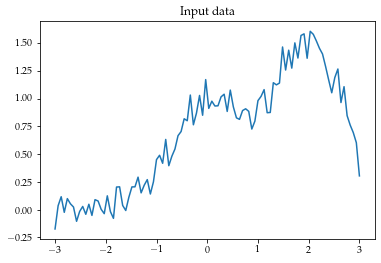

In [4]:
plt.figure()
plt.plot(x, y)
plt.title("Input data")

In [5]:
y_train_df = pd.DataFrame()
y_hat_train_df = pd.DataFrame()
y_test_df = pd.DataFrame()
y_hat_test_df = pd.DataFrame()
X_train_df = pd.DataFrame()
X_test_df = pd.DataFrame()

for degree in range(1, maxdegree+1):
    X_train, X_test, y_train, y_test = prepare_data(x, y, 
                                                    degree, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    scale_x=False,
                                                    scale_y=False,
                                                    intercept=False)
    
    model = OLS() # Instansiate the model
    model.fit(X_train, y_train) # Training the model

    # Predictions
    y_hat_train = model.predict(X_train) # predict on train data
    y_hat_test = model.predict(X_test) # predict on test data
    
    # Filling up dataframes
    X_train_df[f"Degree{degree}"] = X_train[:,1:2].flatten()
    y_train_df[f"Degree{degree}"] = y_train.flatten()
    y_hat_train_df[f"Degree{degree}"] = y_hat_train.flatten()
    
    X_test_df[f"Degree{degree}"] = X_test[:,1:2].flatten()
    y_test_df[f"Degree{degree}"] = y_test.flatten()
    y_hat_test_df[f"Degree{degree}"] = y_hat_test.flatten()

In [6]:
mse_scores_train = ((y_train_df - y_hat_train_df) ** 2).mean()
mse_scores_test = ((y_test_df - y_hat_test_df) ** 2).mean()

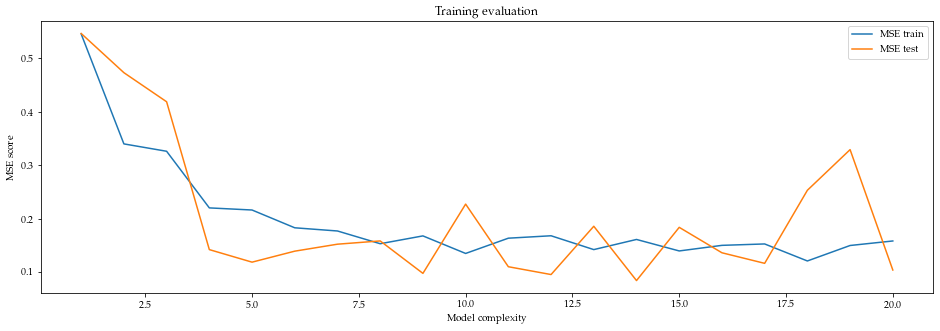

In [7]:
x_plot = np.arange(1,maxdegree+1)
plt.figure(figsize=(16,5))
plt.plot(x_plot, mse_scores_train, label="MSE train")
plt.plot(x_plot, mse_scores_test, label="MSE test")
plt.xlabel("Model complexity")
plt.ylabel("MSE score")
plt.title("Training evaluation")
plt.legend()

In [8]:
#print(y_train_df.mean())
#print(y_hat_train_df.mean())
#print(y_test_df.mean())
#print(y_hat_test_df.mean())

In [9]:
#print(y_train_df.var())
#print(y_hat_train_df.var())
#print(y_test_df.var())
#print(y_hat_test_df.var())

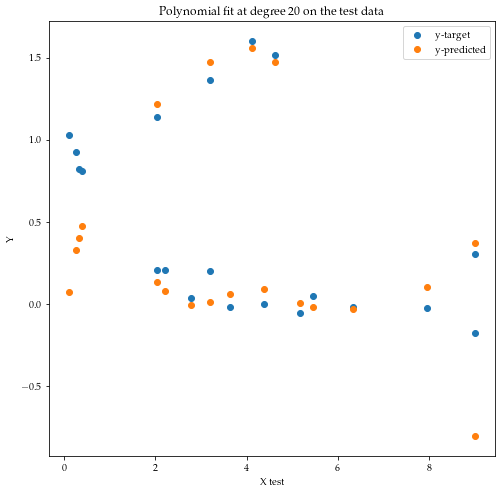

In [10]:
degree = 20
plt.figure(figsize=(8,8))
plt.scatter(X_test_df[f"Degree{degree}"], y_test_df[f"Degree{degree}"], label="y-target")
plt.scatter(X_test_df[f"Degree{degree}"], y_hat_test_df[f"Degree{degree}"], label="y-predicted")
plt.xlabel("X test")
plt.ylabel("Y")
plt.title(f"Polynomial fit at degree {degree} on the test data")
plt.legend()

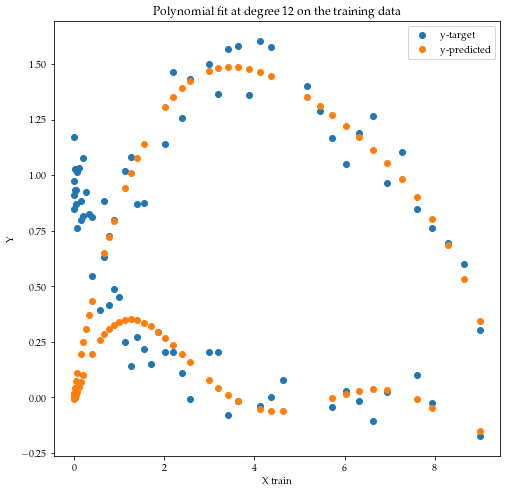

In [11]:
degree = 12
x_plot = np.arange(degree)

plt.figure(figsize=(8,8))

plt.scatter(X_train_df[f"Degree{degree}"], y_train_df[f"Degree{degree}"], label="y-target")
plt.scatter(X_train_df[f"Degree{degree}"], y_hat_train_df[f"Degree{degree}"], label="y-predicted")
plt.xlabel("X train")
plt.ylabel("Y")
plt.title(f"Polynomial fit at degree {degree} on the training data")
plt.legend()

# Exercises week35

In [12]:
#The following simple Python instructions define our x and y values (with 100 data points).
np.random.seed(3155)
x = np.random.rand(100)
y = 2.0+5*x*x+0.1*np.random.randn(100) # Second order polynomial with noise
p = 3 # polynomial degree / number of features

# Data preparation
X_train, X_test, y_train, y_test = prepare_data(x, y, 
                                                features=p, 
                                                test_size=0.2, 
                                                shuffle=True, 
                                                scale_x=False,
                                                scale_y=False,
                                                intercept=False)
print(f"X_train.shape:{X_train.shape}")
print(f"X_test.shape:{X_test.shape}")

# Creating dataframes of the data
X_train_df = pd.DataFrame(X_train, columns=[f"x{f}" for f in np.arange(p)])
X_test_df = pd.DataFrame(X_test, columns=[f"x{f}" for f in np.arange(p)])
#y_train_df = pd.DataFrame(y_train, columns=["y"])
#y_test_df = pd.DataFrame(y_test, columns=["y"])

X_train.shape:(80, 3)
X_test.shape:(20, 3)


In [13]:
# OLS / Linear Regression
## Instansiate the model
model = OLS() 

## Training the model
model.fit(X_train, y_train) 

## Predictions
y_hat_train = model.predict(X_train) # predict on train data
y_hat_test = model.predict(X_test) # predict on test data

## Evaluation
print(f"Training R2 for OLS: {R2(y_train,y_hat_train)}")
print(f"Training MSE for OLS: {MSE(y_train,y_hat_train)}")
print(f"Test R2 for OLS: {R2(y_test,y_hat_test)}")
print(f"Test MSE OLS: {MSE(y_test,y_hat_test)}")

Training R2 for OLS: 0.5961890794615741
Training MSE for OLS: 0.7085594244534505
Test R2 for OLS: 0.7266600763035168
Test MSE OLS: 0.5799927092652428


In [14]:
# Ridge regression
nbf_lambdas = 20
y_train_df = pd.DataFrame()
y_hat_train_df = pd.DataFrame()
y_test_df = pd.DataFrame()
y_hat_test_df = pd.DataFrame()

for lam in np.arange(nbf_lambdas):
    model = RidgeRegression() # Instansiate the model
    model.fit(X_train, y_train, lam) # Training the model
   
    # Predictions
    y_hat_train = model.predict(X_train) # predict on train data
    y_hat_test = model.predict(X_test) # predict on test data
    
    # Filling up dataframes
    y_train_df[f"lambda_{lam}"] = y_train.flatten() 
    y_hat_train_df[f"lambda_{lam}"] = y_hat_train.flatten()
    y_test_df[f"lambda_{lam}"] = y_test.flatten()
    y_hat_test_df[f"lambda_{lam}"] = y_hat_test.flatten()


In [15]:
# MSE calculations for all lambda values
mse_scores_train = ((y_train_df - y_hat_train_df) ** 2).mean()
mse_scores_test = ((y_test_df - y_hat_test_df) ** 2).mean()
# R2 calculations for all lambda values
R2_scores_train = 1 - ((y_train_df - y_hat_train_df) ** 2).sum() / ((y_train_df - y_train_df.mean())**2).sum() 
R2_scores_test = 1 - ((y_test_df - y_hat_test_df) ** 2).sum() / ((y_test_df - y_test_df.mean())**2).sum()


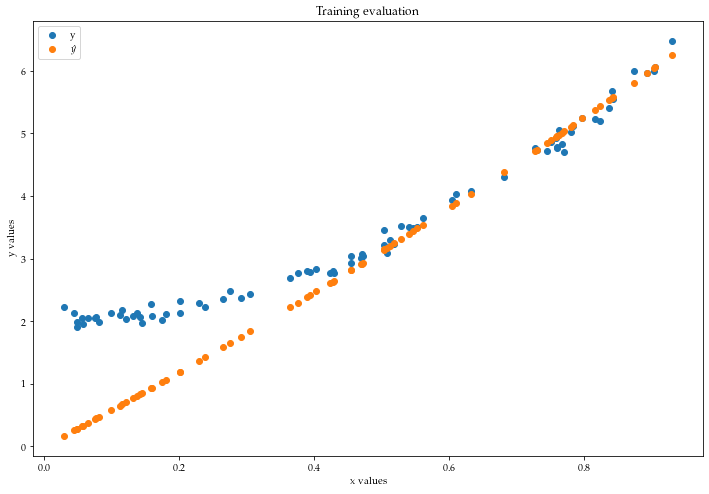

In [23]:
lam = 3
x_plot = np.arange(nbf_lambdas)
plt.figure(figsize=(12,8))
plt.scatter(X_train_df["x0"], y_train_df[f"lambda_{1}"], label="y")
plt.scatter(X_train_df["x0"], y_hat_train_df[f"lambda_{1}"], label="$\hat{y}$")
plt.xlabel("x values")
plt.ylabel("y values")
plt.title("Training evaluation")
plt.legend()